In [19]:
import keras

In [20]:
import pandas as pd

In [21]:
df = pd.read_excel("data/Concrete_Data.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [22]:
names = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer',
       'Coarse Aggregate','Fine Aggregate', 'Age','Strength']
df.columns = names

In [23]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [24]:
features = names[:-1]
predictors = df[features]
target = df[names[-1]]

## Building Model

In [25]:
from keras.models import Sequential

In [26]:
from keras.layers import Dense

In [27]:
model = Sequential()

In [28]:
n_cols = len(features)

In [29]:
model.add(Dense(8, activation='relu', input_shape=(n_cols,))) #level 0: hiden
model.add(Dense(8, activation='relu'))                        #Level 1: hiden
model.add(Dense(8, activation='relu'))                        #Level 2: hiden
model.add(Dense(8, activation='relu'))                        #Level 3: hiden
model.add(Dense(8, activation='relu'))                        #Level 4: hiden
model.add(Dense(1))                                           #Level 5: output

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(predictors,target)

Epoch 1/1
1030/1030 [==============================] - 2s 2ms/step - loss: 203.4862


In [32]:
prediction = model.predict(predictors)

In [33]:
import matplotlib.pyplot as plt

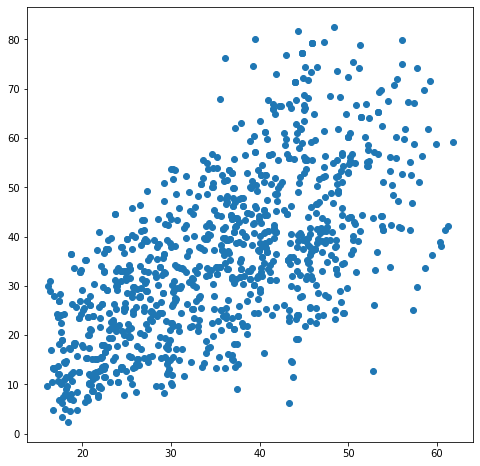

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(prediction,target)
plt.show()

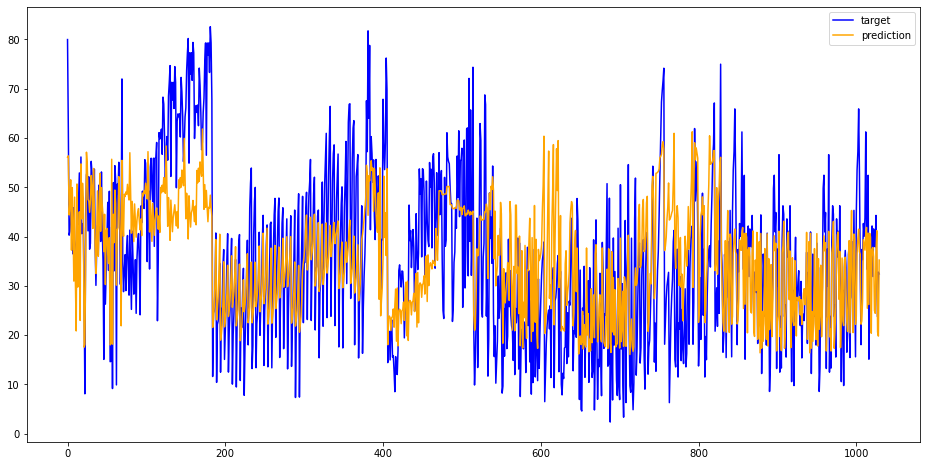

In [35]:
plt.figure(figsize=(16,8))
plt.plot(target, label='target', color='blue')
plt.plot(prediction, label="prediction", color="orange")
plt.legend()
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor
X = prediction.reshape(-1,1)
y = target
forest = RandomForestRegressor(max_depth=6, random_state=0).fit(X,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
pred = forest.predict(X)

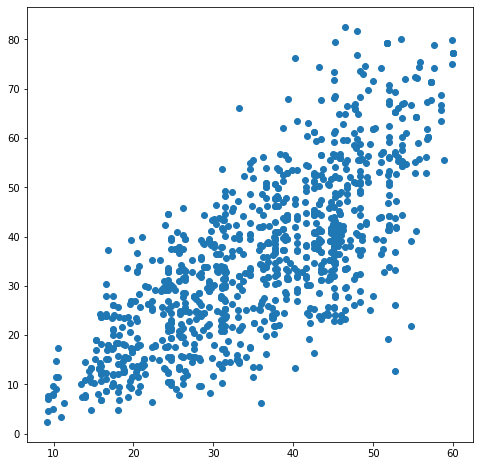

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(pred,target)
plt.show()

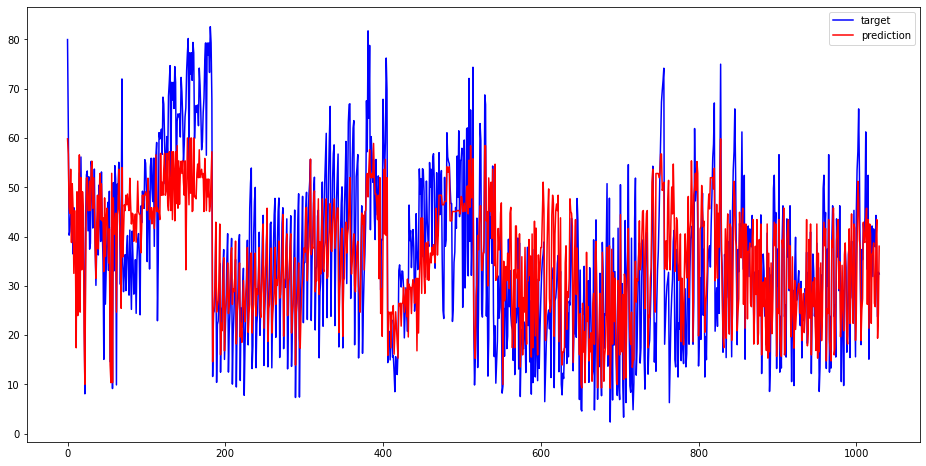

In [40]:
plt.figure(figsize=(16,8))
plt.plot(target, label='target', color='blue')
plt.plot(pred, label="prediction", color="red")
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
err = mean_squared_error (pred,y)
print('error: %.5f'%err)

error: 119.64607
